# Dependencies

In [1]:
import os
import sys

sys.path.append(os.getcwd().split('notebooks')[0])

from src.utilities.utils import *

Device: cpu


In [2]:
import random
# import wandb
import numpy as np
from dotmap import DotMap

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader

import sys
from src.utilities.helper_functions import *

from src.tensor_completion_models.CoSTCo import *
from src.tensor_completion_models.CPD import *
# from src.tensor_completion_models.tuckER import *
from src.tensor_completion_models.ETC import *

import matplotlib.pyplot as plt
from sklearn.utils.validation import check_random_state
import tensorly as tl
from torch.nn.init import xavier_normal_

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, KFold

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


In [4]:
data_folder = f"{work_dir}classification_datasets/"
meta_data_folder = f"{work_dir}meta_datasets/"

# Load Tensor

In [5]:
original_tensor = None
for_queries = False

Query Tensors

In [6]:
# original_tensor = torch.load(f"{meta_data_folder}query_tensors/AND_AND_801.pt")
# original_tensor = torch.load(f"{meta_data_folder}query_tensors/AND_OR_801.pt")
# original_tensor = torch.load(f"{meta_data_folder}query_tensors/OR_AND_801.pt")
# original_tensor = torch.load(f"{meta_data_folder}query_tensors/OR_OR_801.pt")

# original_tensor = torch.load(f"{meta_data_folder}query_tensors/AND_AND_distinct_817.pt")
# original_tensor = torch.load(f"{meta_data_folder}query_tensors/AND_OR_distinct_817.pt")
# original_tensor = torch.load(f"{meta_data_folder}query_tensors/OR_AND_distinct_817.pt")
# original_tensor = torch.load(f"{meta_data_folder}query_tensors/OR_OR_distinct_817.pt")

In [7]:
if (original_tensor is not None):
    original_tensor = (original_tensor - original_tensor.min())/(original_tensor.max() - original_tensor.min())
    for_queries = True

Hyperparameter Tensors

In [8]:
# original_tensor = torch.load(f"{meta_data_folder}GB_car_evaluation_709.pt")
# original_tensor = torch.load(f"{meta_data_folder}SVM_spambase_708.pt")
# original_tensor = torch.load(f"{meta_data_folder}FCNN_Particle_ID_717.pt")
# original_tensor = torch.load(f"{meta_data_folder}FCNN_Spambase_717.pt")
# original_tensor = torch.load(f"{meta_data_folder}FCNN_Glass_717.pt")
# original_tensor = torch.load(f"{meta_data_folder}FCNN_car_evaluation_717.pt")
original_tensor = torch.load(f"{meta_data_folder}RF_Alzheimers_805.pt")

In [9]:
# t1 = torch.load(f"{meta_data_folder}dataset_mode/FCNN_805_807/FCNN_alzheimers_disease_data_807_0.5.pt")
# t2 = torch.load(f"{meta_data_folder}dataset_mode/FCNN_805_807/FCNN_diabetes_binary_807_0.014.pt")
# t3 = torch.load(f"{meta_data_folder}dataset_mode/FCNN_805_807/FCNN_healthcare_dataset_807_0.02.pt")
# t4 = torch.load(f"{meta_data_folder}dataset_mode/FCNN_805_807/FCNN_MiniBoone_Particle_ID_805_0.05.pt")

# original_tensor = t4.clone()

# del t4

# original_tensor = torch.stack((t1, t2, t3, t4))

# del t1, t2, t3, t4

# original_tensor = original_tensor[0, :, :, :, :].clone()

In [10]:
# t1 = torch.load(f"{work_dir}meta_datasets/model_mode/RF_car_727.pt")
# t2 = torch.load(f"{work_dir}meta_datasets/model_mode/DT_car_727.pt")
# t3 = torch.load(f"{work_dir}meta_datasets/model_mode/GB_car_728.pt")
# t4 = torch.load(f"{work_dir}meta_datasets/model_mode/ET_car_730.pt")

# tensor1 = torch.stack((t1, t2, t3, t4))

# del t1, t2, t3, t4

# t1 = torch.load(f"{work_dir}meta_datasets/model_mode/RF_glass_728.pt")
# t2 = torch.load(f"{work_dir}meta_datasets/model_mode/DT_glass_728.pt")
# t3 = torch.load(f"{work_dir}meta_datasets/model_mode/GB_glass_728.pt")
# t4 = torch.load(f"{work_dir}meta_datasets/model_mode/ET_glass_730.pt")

# tensor2 = torch.stack((t1, t2, t3, t4))

# del t1, t2, t3, t4

# t1 = torch.load(f"{work_dir}meta_datasets/model_mode/RF_bodyPerformance_731.pt")
# t2 = torch.load(f"{work_dir}meta_datasets/model_mode/DT_bodyPerformance_731.pt")
# t3 = torch.load(f"{work_dir}meta_datasets/model_mode/GB_bodyPerformance_731.pt")
# t4 = torch.load(f"{work_dir}meta_datasets/model_mode/ET_bodyPerformance_731.pt")

# tensor3 = torch.stack((t1, t2, t3, t4))

# del t1, t2, t3, t4

# t1 = torch.load(f"{work_dir}meta_datasets/model_mode/RF_Dermatology_802.pt")
# t2 = torch.load(f"{work_dir}meta_datasets/model_mode/DT_Dermatology_802.pt")
# t3 = torch.load(f"{work_dir}meta_datasets/model_mode/GB_Dermatology_802.pt")
# t4 = torch.load(f"{work_dir}meta_datasets/model_mode/ET_Dermatology_802.pt")

# tensor4 = torch.stack((t1, t2, t3, t4))

# del t1, t2, t3, t4

# # original_tensor = torch.stack((tensor1, tensor2, tensor3, tensor4))
# original_tensor = torch.stack((tensor1, tensor3))[0, :, 1:, 2:, 2:, 2:].clone()

# del tensor1, tensor2, tensor3, tensor4

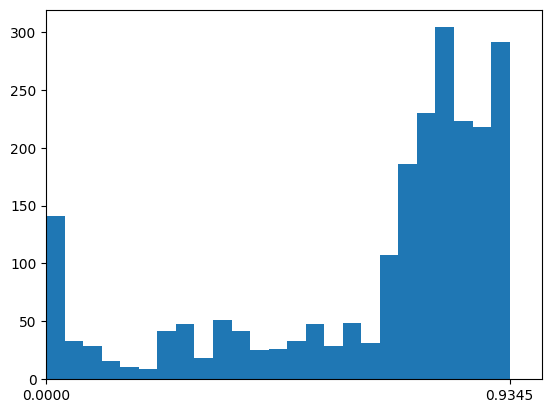

In [11]:
plt.hist([float(x) for x in original_tensor.flatten()], bins = 25)
plt.xlim(0, 1)
plt.xticks([original_tensor.min(), original_tensor.max()])
plt.show()

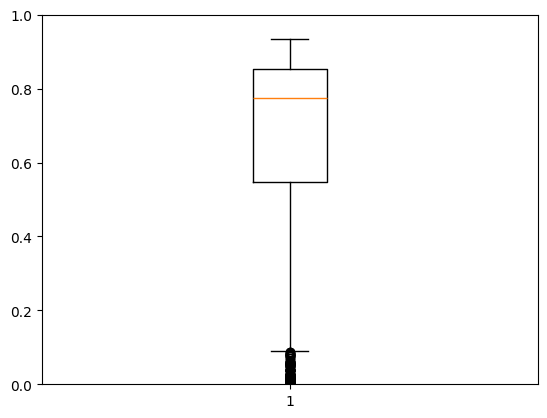

In [12]:
plt.boxplot([float(x) for x in original_tensor.flatten()])
plt.ylim(0, 1)
plt.show()

In [13]:
print(f"Tensor shape: {original_tensor.shape}")
total_cells = 1
for s in original_tensor.shape: total_cells*=s

print(f"{total_cells} total cells in tensor.")

Tensor shape: torch.Size([5, 8, 7, 8])
2240 total cells in tensor.


# Train & Evaluate

In [14]:
num_epochs = 10000
batch_size = 256
lr = 5e-3
wd = 1e-4
val_size = 0.2

num_iterations = 5

ranks = [1, 2, 3, 4, 5, 7, 10, 15, 20, 32]
# ranks = list(range(1, 15+1))
# ranks = [None]

portion = 0.025

In [15]:
MAEs = list()

for rank in ranks:

        it_MAEs = list()
        
        print(f"Rank {rank} iteration:", end = " ")
        for it in range(1, num_iterations+1):
                
                sparse_tensor = get_sparse_tensor(t = original_tensor.clone(),
                                                  portion = portion,
                                                  verbose = False)
                
                        
                model_MAEs = list()
                
                
# _________________________________________________________________________________________________________________________________________________________________

                # Naive methods

                model_MAEs += [get_naive_unique_MAE(sparse_tensor = sparse_tensor,
                                                    original_tensor = original_tensor,
                                                    random_method = 'median')]     
                
                model_MAEs += [get_naive_unique_MAE(sparse_tensor = sparse_tensor,
                                                    original_tensor = original_tensor,
                                                    random_method = 'sampling')]                
                        
                  
                        
# _________________________________________________________________________________________________________________________________________________________________

                        
                model = train_tensor_completion(model_type = 'NeAT',
                                                sparse_tensor = sparse_tensor,
                                                rank = rank,
                                                num_epochs = num_epochs,
                                                batch_size = batch_size,
                                                lr = lr,
                                                wd = wd,
                                                early_stopping = True,
                                                flags = 15,
                                                val_size = 0.2,
                                                convert_to_cpd = False,
                                                for_queries = for_queries,
                                                device = device)
                
                model_MAEs += [get_unique_MAE(model = model,
                                                full_t = original_tensor.clone(),
                                                sparse_t = sparse_tensor.clone(),
                                                return_errors = False,
                                                return_indices = False,
                                                device = device)]
                
                
                del model
                        
                
# _________________________________________________________________________________________________________________________________________________________________

                model = train_tensor_completion(model_type = 'cpd.smooth',
                        sparse_tensor = sparse_tensor,
                        rank = rank,
                        num_epochs = num_epochs,
                        batch_size = batch_size,
                        lr = lr,
                        wd = wd,
                        cpd_smooth_lambda = 2,
                        cpd_smooth_window = 3,
                        early_stopping = True,
                        flags = 15,
                        val_size = 0.2,
                        convert_to_cpd = False,
                        for_queries = for_queries,
                        device = device)
                
                model_MAEs += [get_unique_MAE(model = model,
                                                full_t = original_tensor.clone(),
                                                sparse_t = sparse_tensor.clone(),
                                                return_errors = False,
                                                return_indices = False,
                                                device = device)]
                
                
                del model
                
# _________________________________________________________________________________________________________________________________________________________________

                model = train_tensor_completion(model_type = 'tensor.train',
                        sparse_tensor = sparse_tensor,
                        rank = rank,
                        num_epochs = num_epochs,
                        batch_size = batch_size,
                        lr = 1e-3,
                        wd = wd,
                        early_stopping = True,
                        flags = 15,
                        val_size = 0.2,
                        convert_to_cpd = False,
                        for_queries = for_queries,
                        device = device)
                
                model_MAEs += [get_unique_MAE(model = model,
                                                full_t = original_tensor.clone(),
                                                sparse_t = sparse_tensor.clone(),
                                                return_errors = False,
                                                return_indices = False,
                                                device = device)]
                
                
                del model
                
# _________________________________________________________________________________________________________________________________________________________________
                        
                        
                it_MAEs +=[model_MAEs]


                if (it == num_iterations): print(it)
                else: print(it, end = ", ")

        MAEs += [it_MAEs]

MAEs = np.array(MAEs)
print("\nAll done!")

Rank 1 iteration: 

1, 2, 3, 4, 5
Rank 2 iteration: 1, 2, 3, 4, 5
Rank 3 iteration: 1, 2, 3, 4, 5
Rank 4 iteration: 1, 2, 3, 4, 5
Rank 5 iteration: 1, 2, 3, 4, 5
Rank 7 iteration: 1, 2, 3, 4, 5
Rank 10 iteration: 1, 2, 3, 4, 5
Rank 15 iteration: 1, 2, 3, 4, 5
Rank 20 iteration: 1, 2, 3, 4, 5
Rank 32 iteration: 1, 2, 3, 4, 5

All done!


In [16]:
labels = ['Naive (Median)', 'Naive (Sampling)', 
          'NeAT', 
          'CPD Smooth', 
          'Tensor Train']

# Plot Results

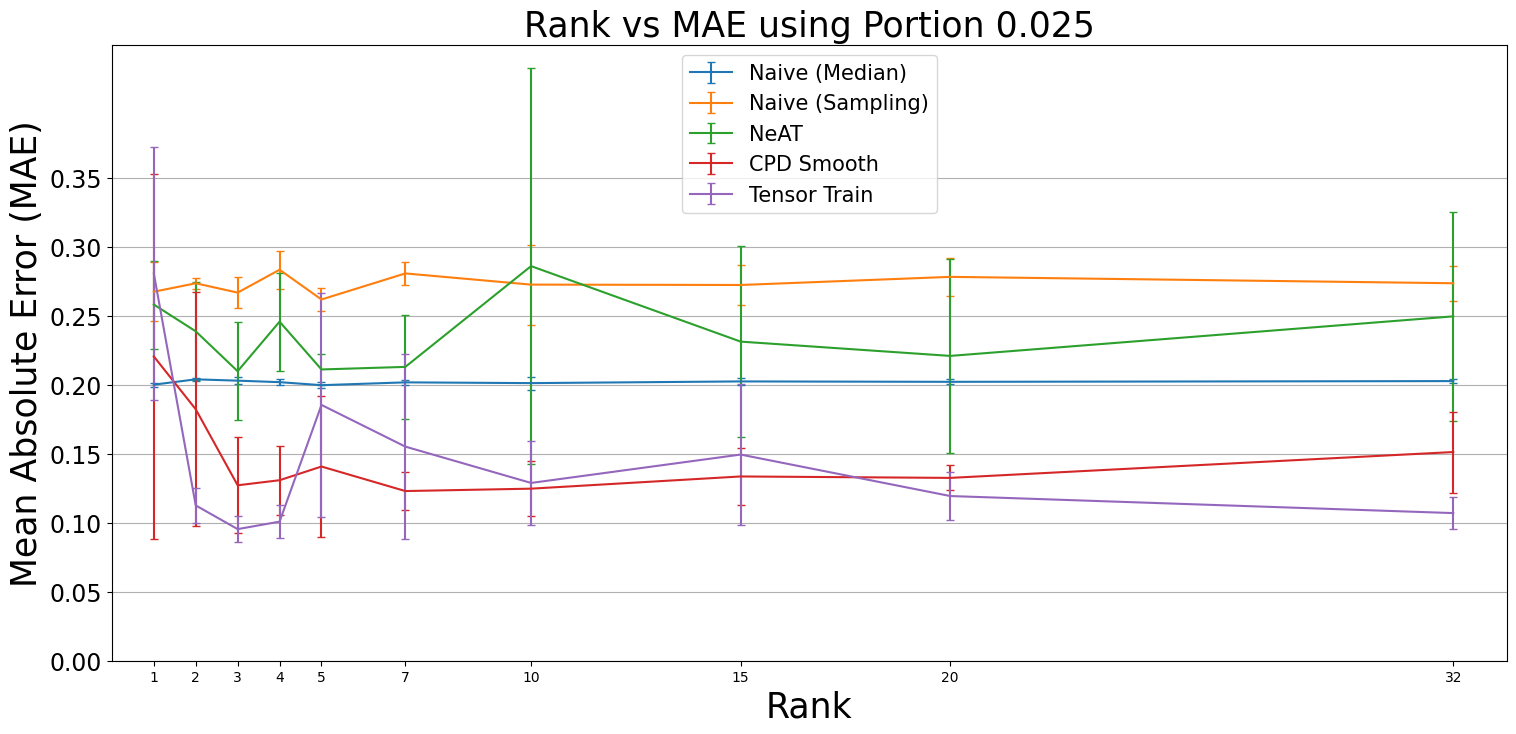

In [17]:
x = ranks

plt.figure(figsize=(18, 8))
# plt.rcParams.update({'font.size':12})

for i in range(MAEs.shape[-1]):
    
    current_model = MAEs[:, :, i]
    
    plt.errorbar(x, current_model.mean(axis = 1), yerr=current_model.std(axis = 1), label=labels[i], capsize=3)
    

plt.xlabel('Rank', fontsize=25)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=25)
# plt.xticks([t/100 for t in range(1, 10+1)], fontsize=17)
plt.xticks([t for t in x])
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], fontsize = 17)

plt.title(f'Rank vs MAE using Portion {portion}', fontsize=25)
plt.legend(fontsize=15)
plt.grid(axis='y')

plt.xlim(0, x[-1]+(x[-1]/25))
# plt.ylim(0.1, 0.2)
# plt.ylim(0, 0.25)
plt.ylim(bottom = 0)

plt.show()